# 一、概述

matplotlib的原理或者说基础逻辑是，用Artist对象在画布(canvas)上绘制(Render)图形。

matplotlib有三个层次的API：

matplotlib.backend_bases.FigureCanvas 代表了绘图区，所有的图像都是在绘图区完成的

matplotlib.backend_bases.Renderer 代表了渲染器，可以近似理解为画笔，控制如何在 FigureCanvas 上画图。

matplotlib.artist.Artist 代表了具体的图表组件，即调用了Renderer的接口在Canvas上作图。

前两者处理程序和计算机的底层交互的事项，第三项Artist就是具体的调用接口来做出我们想要的图，比如图形、文本、线条的设定。所以通常来说，我们95%的时间，都是用来和matplotlib.artist.Artist类打交道的。

Artist有两种类型：primitives 和containers。

primitive是基本要素，它包含一些我们要在绘图区作图用到的标准图形对象，如曲线Line2D，文字text，矩形Rectangle，图像image等。

container是容器，即用来装基本要素的地方，包括图形figure、坐标系Axes和坐标轴Axis。

matplotlib的标准使用流程为：

1. 创建一个Figure实例
2. 使用Figure实例创建一个或者多个Axes或Subplot实例
3. 使用Axes实例的辅助方法来创建primitive

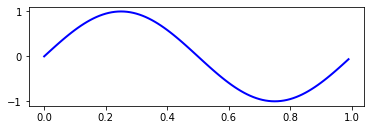

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# step 1 
# 我们用 matplotlib.pyplot.figure() 创建了一个Figure实例
fig = plt.figure()

# step 2
# 然后用Figure实例创建了一个两行一列(即可以有两个subplot)的绘图区，并同时在第一个位置创建了一个subplot
ax = fig.add_subplot(2, 1, 1) # two rows, one column, first plot

# step 3
# 然后用Axes实例的方法画了一条曲线
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax.plot(t, s, color='blue', lw=2)

# 二、自定义你的Artist对象
## 1. Artist属性

在图形中的每一个元素都对应着一个matplotlib.Artist，且都有其对应的配置属性列表。

Figure.patch属性：是一个Rectangle，代表了图表的矩形框，它的大小就是图表的大小， 并且可以通过它设置figure的背景色和透明度。

Axes.patch属性：也是一个Rectangle，代表了绘图坐标轴内部的矩形框（白底黑边）， 通过它可以设置Axes的颜色、透明度等。

每个matplotlib Artist都有以下属性：

- .alpha属性：透明度。值为0—1之间的浮点数
- .axes属性：返回这个Artist所属的axes，可能为None
- .figure属性：该Artist所属的Figure，可能为None
- .label：一个text label
- .visible：布尔值，控制Artist是否绘制

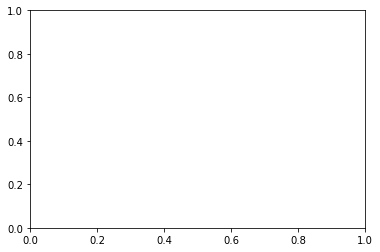

In [2]:
# .patch
plt.figure().patch
plt.axes().patch

Artist对象的所有属性都通过相应的 get_* 和 set_* 函数进行读写。
例如下面的语句将alpha属性设置为当前值的一半：

a = o.get_alpha()

o.set_alpha(0.5*a)

如果想一次设置多个属性，也可以用set方法：

o.set(alpha=0.5, zorder=2)

可以使用 matplotlib.artist.getp(o,"alpha") 来获取属性，如果指定属性名，则返回对象的该属性值；如果不指定属性名，则返回对象的所有的属性和值。


In [5]:
import matplotlib
# Figure rectangle的属性
matplotlib.artist.getp(fig.patch)

    agg_filter = None
    alpha = None
    animated = False
    antialiased or aa = False
    bbox = Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0)
    capstyle = butt
    children = []
    clip_box = None
    clip_on = True
    clip_path = None
    contains = None
    data_transform = BboxTransformTo(     TransformedBbox(         Bbox...
    edgecolor or ec = (1.0, 1.0, 1.0, 0.0)
    extents = Bbox(x0=0.0, y0=0.0, x1=432.0, y1=288.0)
    facecolor or fc = (1.0, 1.0, 1.0, 0.0)
    figure = Figure(432x288)
    fill = True
    gid = None
    hatch = None
    height = 1
    in_layout = False
    joinstyle = miter
    label = 
    linestyle or ls = solid
    linewidth or lw = 0.0
    patch_transform = CompositeGenericTransform(     BboxTransformTo(   ...
    path = Path(array([[0., 0.],        [1., 0.],        [1.,...
    path_effects = []
    picker = None
    rasterized = None
    sketch_params = None
    snap = None
    transform = CompositeGenericTransform(     CompositeGenericTra...
    transfo

# 三、基本元素 - primitives

## 1. 2DLines
在matplotlib中曲线的绘制，主要是通过类 matplotlib.lines.Line2D 来完成的。
它的基类: matplotlib.artist.Artist

matplotlib中线-line的含义：它表示的可以是连接所有顶点的实线样式，也可以是每个顶点的标记。此外，这条线也会受到绘画风格的影响，比如，我们可以创建虚线种类的线。

其中常用的的参数有：

- xdata:需要绘制的line中点的在x轴上的取值，若忽略，则默认为- range(1,len(ydata)+1)
- ydata:需要绘制的line中点的在y轴上的取值
- linewidth:线条的宽度
- linestyle:线型
- color:线条的颜色
- marker:点的标记
- markersize:标记的size

有三种方法可以用设置线的属性。

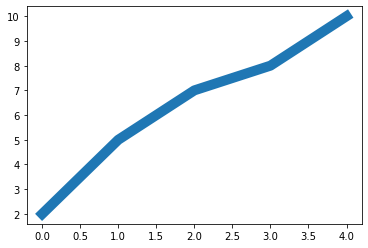

In [6]:
# 1) 直接在plot()函数中设置
import matplotlib.pyplot as plt
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x,y, linewidth=10) # 设置线的粗细参数为10

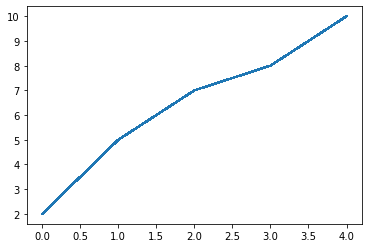

In [7]:
# 2) 通过获得线对象，对线对象进行设置
x = range(0,5)
y = [2,5,7,8,10]
line, = plt.plot(x, y, '-')
line.set_antialiased(False) # 关闭抗锯齿功能

[None, None]

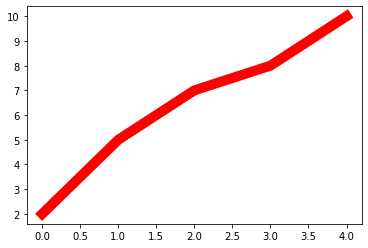

In [8]:
# 3) 获得线属性，使用setp()函数设置
x = range(0,5)
y = [2,5,7,8,10]
lines = plt.plot(x, y)
plt.setp(lines, color='r', linewidth=10)

如何绘制lines

1) 绘制直线line 常用的方法有两种

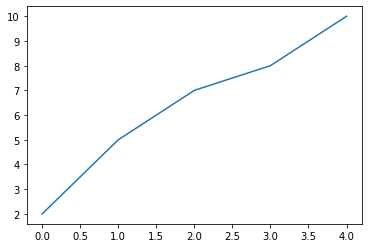

In [9]:
# pyplot方法绘制
import matplotlib.pyplot as plt
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x,y)

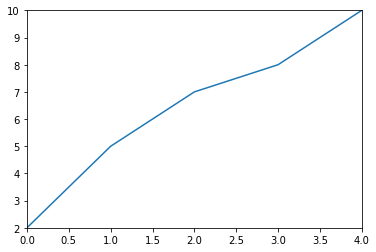

In [10]:
# Line2D对象绘制
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D      

fig = plt.figure()
ax = fig.add_subplot(111)
line = Line2D(x, y)
ax.add_line(line)
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))

plt.show()

2) errorbar绘制误差折线图

pyplot里有个专门绘制误差线的功能，通过errorbar类实现

最主要的参数:

- x：需要绘制的line中点的在x轴上的取值
- y：需要绘制的line中点的在y轴上的取值
- yerr：指定y轴水平的误差
- xerr：指定x轴水平的误差
- fmt：指定折线图中某个点的颜色，形状，线条风格，例如‘co--’
- ecolor：指定error bar的颜色
- elinewidth：指定error bar的线条宽度

<ErrorbarContainer object of 3 artists>

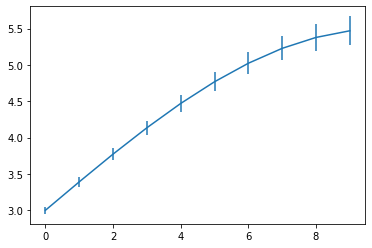

In [11]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)
plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')

## 2. patches
matplotlib.patches.Patch类是二维图形类。它的基类是matplotlib.artist.Artist

### a. Rectangle-矩形
Rectangle矩形类在官网中的定义是： 通过锚点xy及其宽度和高度生成。 Rectangle本身的主要比较简单，即xy控制锚点，width和height分别控制宽和高。

1) hist-直方图

下面是一些常用的参数：

- x: 数据集，最终的直方图将对数据集进行统计
- bins: 统计的区间分布
- range: tuple, 显示的区间，range在没有给出bins时生效
- density: bool，默认为false，显示的是频数统计结果，为True则显示频率统计结果，这里需要注意，频率统计结果=区间数目/(总数*区间宽度)，和normed效果一致，官方推荐使用density
- histtype: 可选{'bar', 'barstacked', 'step', 'stepfilled'}之一，默认为bar，推荐使用默认配置，step使用的是梯状，stepfilled则会对梯状内部进行填充，效果与bar类似
- align: 可选{'left', 'mid', 'right'}之一，默认为'mid'，控制柱状图的水平分布，left或者right，会有部分空白区域，推荐使用默认
- log: bool，默认False,即y坐标轴是否选择指数刻度
- stacked: bool，默认为False，是否为堆积状图

(0.0, 100.0)

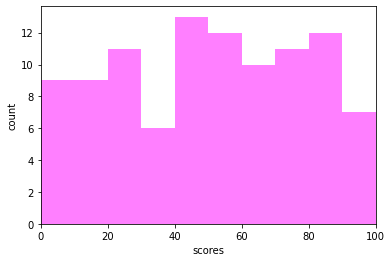

In [12]:
import matplotlib.pyplot as plt
import numpy as np 
x=np.random.randint(0,100,100) #生成【0-100】之间的100个数据,即 数据集 
bins=np.arange(0,101,10) #设置连续的边界值，即直方图的分布区间[0,10],[10,20]... 
plt.hist(x,bins,color='fuchsia',alpha=0.5)#alpha设置透明度，0为完全透明 
plt.xlabel('scores') 
plt.ylabel('count') 
plt.xlim(0,100)#设置x轴分布范围 plt.show()

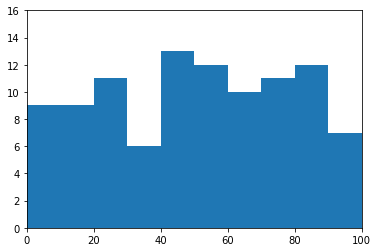

In [13]:
import pandas as pd
import re
df = pd.DataFrame(columns = ['data'])
df.loc[:,'data'] = x
df['fenzu'] = pd.cut(df['data'], bins=bins, right = False,include_lowest=True)

df_cnt = df['fenzu'].value_counts().reset_index()
df_cnt.loc[:,'mini'] = df_cnt['index'].astype(str).map(lambda x:re.findall('\[(.*)\,',x)[0]).astype(int)
df_cnt.loc[:,'maxi'] = df_cnt['index'].astype(str).map(lambda x:re.findall('\,(.*)\)',x)[0]).astype(int)
df_cnt.loc[:,'width'] = df_cnt['maxi']- df_cnt['mini']
df_cnt.sort_values('mini',ascending = True,inplace = True)
df_cnt.reset_index(inplace = True,drop = True)

#用Rectangle把hist绘制出来
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)
#rect1 = plt.Rectangle((0,0),10,10)
#ax1.add_patch(rect)

#ax2 = fig.add_subplot(212)
for i in df_cnt.index:
    rect =  plt.Rectangle((df_cnt.loc[i,'mini'],0),df_cnt.loc[i,'width'],df_cnt.loc[i,'fenzu'])
#rect2 = plt.Rectangle((10,0),10,5)
    ax1.add_patch(rect)
#ax1.add_patch(rect2)
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 16)
plt.show()

2) bar-柱状图

下面是一些常用的参数：

- left：x轴的位置序列，一般采用range函数产生一个序列，但是有时候可以是字符串
- height：y轴的数值序列，也就是柱形图的高度，一般就是我们需要展示的数据；
- alpha：透明度，值越小越透明
- width：为柱形图的宽度，一般这是为0.8即可；
- color或facecolor：柱形图填充的颜色；
- edgecolor：图形边缘颜色
- label：解释每个图像代表的含义，这个参数是为legend()函数做铺垫的，表示该次bar的标签

<BarContainer object of 16 artists>

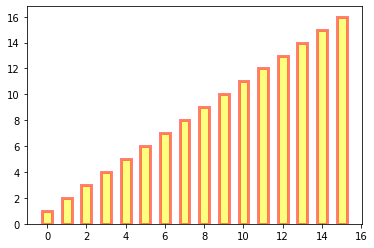

In [14]:
import matplotlib.pyplot as plt
y = range(1,17)
plt.bar(np.arange(16), y, alpha=0.5, width=0.5, color='yellow', edgecolor='red', label='The First Bar', lw=3)

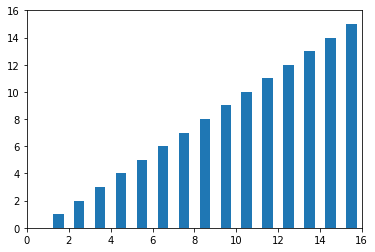

In [15]:
# Rectangle矩形类绘制柱状图
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(1,17):
    rect =  plt.Rectangle((i+0.25,0),0.5,i)
    ax1.add_patch(rect)
ax1.set_xlim(0, 16)
ax1.set_ylim(0, 16)
plt.show()

## b. Polygon-多边形
